In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score
from mlxtend.plotting import plot_confusion_matrix

In [56]:
df=pd.read_csv("IRIS.csv")

In [57]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
Column_of_boxplot=['sepal_length','sepal_width','petal_length','petal_width']

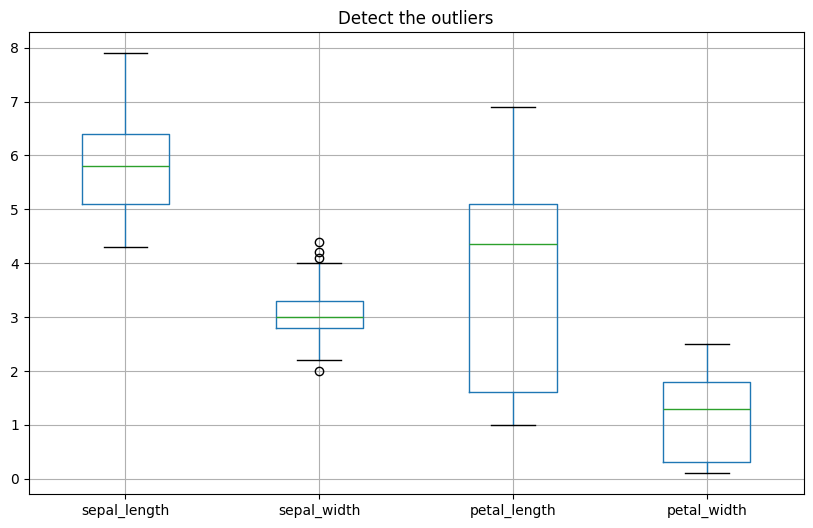

In [62]:
plt.figure(figsize=(10,6))
df[Column_of_boxplot].boxplot()
plt.title("Detect the outliers")
plt.show()

In [63]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers from column 'sepal_width'
df_no_outliers = remove_outliers_iqr(df, 'sepal_width')



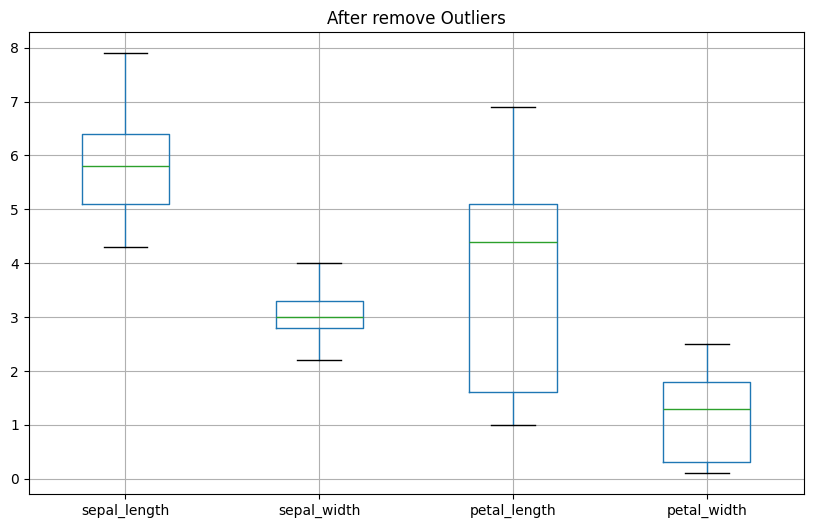

In [64]:
plt.figure(figsize=(10,6))
df_no_outliers[Column_of_boxplot].boxplot()
plt.title("After remove Outliers")
plt.show()
df=df_no_outliers

In [65]:
species_mapping={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['species']=df['species'].map(species_mapping)
df['species']=df['species'].astype('int')

In [66]:
df.head()#con

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
naive_baise_classifer=GaussianNB()
naive_baise_classifer.fit(X_train,y_train)

GaussianNB()

In [70]:
y_pred=naive_baise_classifer.predict(X_test)

In [71]:
confu_matrix=confusion_matrix(y_test,y_pred)
print(confu_matrix)

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


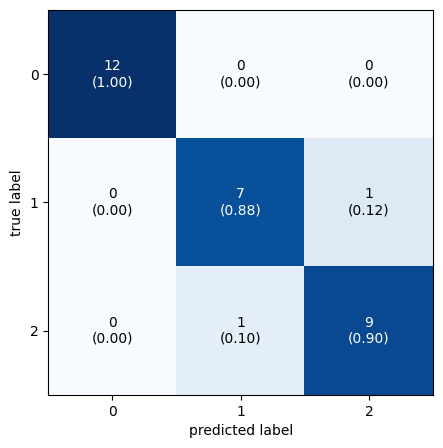

In [72]:
plot_confusion_matrix(conf_mat=confu_matrix,figsize=(5,5),show_normed=True)
plt.show()

In [74]:
TP=confu_matrix[1][1]
FP=confu_matrix[0][1]
TN=confu_matrix[0][0]
FN=confu_matrix[1][0]

In [77]:
accuracy=accuracy_score(y_test,y_pred)
error=1-accuracy
precision=precision_score(y_test,y_pred,average="weighted")
recall=recall_score(y_test,y_pred,average='weighted')

In [79]:
print(f"Accuracy Score is {accuracy}")
print(f"Error is {error}")
print(f"Precision Score {precision}")
print(f"Recall Score is {recall}")

Accuracy Score is 0.9333333333333333
Error is 0.06666666666666665
Precision Score 0.9333333333333333
Recall Score is 0.9333333333333333
